In [1]:
import os, sys
import numpy as np
import EMdata
import torch
import itertools
import random, math
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
#GPU or CPU
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  
device = torch.device(dev) 

In [3]:
#data path
file_path0='F:/script/class2vec/real_star_file/GSS1993.star'
file_path1='F:/script/class2vec/real_star_file/MAVS_CARD_ig_0.star'
datatype0=0  #0 is relion 3.1, 1 is relion 3, 2 is cryosparc
datatype1=0
block_size=64

output_path=os.path.dirname(file_path0)+'/'+'mix'
if os.path.isdir(output_path) is False:
    os.mkdir(output_path)

In [4]:
if datatype0<2:
    file_info0=EMdata.read_relion(file_path0)
    if datatype0==0:
        #read data (relion3.1)
        dataset0=file_info0.getRdata_31()
        optics0=file_info0.extractoptic()
    else:
        #read relion 3.0
        dataset0=file_info0.getRdata()
    metadata0=dataset0[0]
    print(metadata0)
    data0=dataset0[1]
    print(data0[0])
    corpus_information0=EMdata.process_helical(dataset0).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset0).extract_helical()
corpus_dic0=corpus_information0[0]
corpus0=list(corpus_dic0.values())
corpus_backup0=corpus0[:]

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLengthAngst', '_rlnAnglePsiFlipRatio', '_rlnAngleRotFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnOpticsGroup', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnGroupNumber', '_rlnAngleRot', '_rlnAngleTilt', '_rlnAnglePsi', '_rlnOriginXAngst', '_rlnOriginYAngst', '_rlnClassNumber', '_rlnNormCorrection', '_rlnLogLikeliContribution', '_rlnMaxValueProbDistribution', '_rlnNrOfSignificantSamples']
['1420.068461', '4429.790591', '1', '90.000000', '71.896237', '0.000000', '0.500000', '0.500000', '000001@Extract/job005/Micrographs/20mar27a_GSS1993_00006gr_00019sq_00002hl_00006es-a-DW.mrcs', 'Micrographs/20mar27a_GSS1993_00006gr_00019sq_00002hl_00006es-a-DW.mrc', '1', '4.662000', '0.384161', '9202.967773', '8995.772461', '-17.42114', '0.000000', '1.000000

In [5]:
if datatype1<2:
    file_info1=EMdata.read_relion(file_path1)
    if datatype1==0:
        #read data (relion3.1)
        dataset1=file_info1.getRdata_31()
        optics1=file_info1.extractoptic()
    else:
        #read relion 3.0
        dataset1=file_info1.getRdata()
    metadata1=dataset1[0]
    print(metadata1)
    data1=dataset1[1]
    print(data1[0])
    corpus_information1=EMdata.process_helical(dataset1).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset).extract_helical()
corpus_dic1=corpus_information1[0]
corpus1=list(corpus_dic1.values())
corpus_backup1=corpus1[:]

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnClassNumber', '_rlnAutopickFigureOfMerit', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnOpticsGroup', '_rlnHelicalTrackLengthAngst', '_rlnGroupNumber', '_rlnAngleRot', '_rlnAngleTilt', '_rlnAnglePsi', '_rlnOriginXAngst', '_rlnOriginYAngst', '_rlnNormCorrection', '_rlnLogLikeliContribution', '_rlnMaxValueProbDistribution', '_rlnNrOfSignificantSamples']
['1846.636669', '2607.309810', '4', '2.621288', '1', '90.000000', '150.880921', '0.500000', '000001@Extract/job019/Micrographs/Falcon_2014_11_05-15_43_41_0.mrcs', 'MotionCorr/job009/Micrographs/Falcon_2014_11_05-15_43_41_0.mrc', '45124.839844', '43812.781250', '-34.47360', '0.000000', '1.000000', '0.000000', '4.919178', '0.236375', '1', '0.000000', '1', 

In [6]:
# cryosparc
#corpus_ignore=corpus

In [7]:
corpus_ignore_0=[]
for i in range(len(corpus0)):
    corpus_row=[]
    count=1
    lst=corpus0[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore_0.append(corpus_row)

In [8]:
vocabulary0 = set(itertools.chain.from_iterable(corpus_ignore_0))
vocabulary_size0 = len(vocabulary0)
print(vocabulary_size0)
count0=dict(Counter([x for lst in corpus_ignore_0 for x in lst]))
count0=np.array(list(count0.items()),dtype='i')

50


In [9]:
corpus_ignore_1=[]
for i in range(len(corpus1)):
    corpus_row=[]
    count=1
    lst=corpus1[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]+vocabulary_size0))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]+vocabulary_size0))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore_1.append(corpus_row)

In [10]:
corpus_ignore_old=corpus_ignore_0+corpus_ignore_1
data=data0+data1
vocabulary = set(itertools.chain.from_iterable(corpus_ignore_old))
vocabulary_size = len(vocabulary)
print(vocabulary_size)
count1=dict(Counter([x for lst in corpus_ignore_old[len(corpus_ignore_0):] for x in lst]))
count1=np.array(list(count1.items()),dtype='i')

100


In [11]:
word_to_index = {w: idx for (idx, w) in enumerate(vocabulary)}
index_to_word = {idx: w for (idx, w) in enumerate(vocabulary)}

In [12]:
filament_n_0=len(corpus_ignore_0)
data_length=len(data0)+len(data1)
def mix_random(corpus_list, filament_n_0, length, percent, count0,count1):
    random_items=random.sample(list(range(length)),round(length*percent/100))
    pop0=count0[:,0]
    pop1=count1[:,0]
    p0=count0[:,1]/count0[:,1].sum()
    p1=count1[:,1]/count1[:,1].sum()
    count=0
    for i in range(filament_n_0):
        lst=corpus_list[i]
        for j in range(len(lst)):
            if count in random_items:
                corpus_list[i][j]=random.choices(pop1,p1)[0]
                #print(i,j,random.choices(pop1,p1)[0])
            count+=1
            if count%10000==0:
                print(count)
    for i in range(filament_n_0,len(corpus_list)):
        lst=corpus_list[i]
        for j in range(len(lst)):
            if count in random_items:
                corpus_list[i][j]=random.choices(pop0,p0)[0]
            count+=1
            if count%10000==0:
                print(count)
    return corpus_list
percent=40
corpus_ignore=mix_random(corpus_ignore_old,filament_n_0,data_length,percent,count0, count1)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000


In [13]:
print(corpus_ignore_0[3])

['23', '6', '6', '32', '32', '35', '14', 75, '37', '11', '45', '27', '5', '7', '25', 84, '35', 93, '38', 81, 59, '16', '25', '16', '16', 84, '31', '6', 81, '10', '10', '10', '39', 81, 83, 51, '38']


In [14]:
times=0
for i in range(len(corpus_ignore)):
    for j in range(len(corpus_ignore[i])):
        if type(corpus_ignore[i][j]) is str:
            times+=1
        corpus_ignore[i][j]=str(corpus_ignore[i][j])

In [15]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer
if os.path.isdir(output_path+"/corpus") is False:
    os.mkdir(output_path+"/corpus")
paths = [str(x) for x in Path(output_path+"/corpus/").glob("**/*.txt")]

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=vocabulary_size, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
if os.path.isdir(output_path+"/tokens") is False:
    os.mkdir(output_path+"/tokens")
if os.path.isdir("./tokens") is False:
    os.mkdir("./tokens")
tokenizer.save_model(output_path+"/tokens")
tokenizer.save_model("./tokens")

['./tokens\\vocab.json', './tokens\\merges.txt']

In [16]:
print(corpus_ignore[1])

['9', '5', '71', '38', '84', '67', '65', '50', '75', '82', '58', '61', '76', '89', '8', '46', '71', '34', '48', '53', '36', '18', '18', '18', '18', '66', '29', '63', '17', '49', '76', '58']


In [17]:
import json

with open(output_path+'/tokens/vocab.json') as f:
    decode = json.load(f)
encode={value:key for (key, value) in decode.items()}
corpus_code=[]
for i in range(len(corpus_ignore)):
    lst=corpus_ignore[i]
    corpus_row=[]
    for j in range(len(lst)):
        corpus_row.append(encode[word_to_index[lst[j]]+5])
    corpus_code.append(corpus_row)
with open(output_path+"/corpus/helical.txt","w") as f:
    for i in range(len(corpus_code)):
        lst=corpus_code[i]
        for j in range(len(lst)):
            if j==len(lst)-1:
                f.write(lst[j]+'\n')
            else:
                f.write(lst[j])

In [18]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained(output_path+"/tokens", max_len=514)
#tokenizer.encode(encode[word_to_index['0']+5])

from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=50_000,
    max_position_embeddings=128,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1,
)
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)

In [19]:
%%time
from transformers import LineByLineTextDataset

data_import = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=output_path+"/corpus/helical.txt",
    block_size=block_size,
)

Wall time: 923 ms


In [20]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [21]:
from transformers import Trainer, TrainingArguments

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    train_dataset=data_import,
    prediction_loss_only=True,
)

D:\ProgramData\Anaconda3\lib\site-packages\transformers\trainer.py:247: FutureWarning: Passing `prediction_loss_only` as a keyword argument is deprecated and won't be possible in a future version. Use `args.prediction_loss_only` instead.
  FutureWarning,


In [22]:
trainer.train()

{'loss': 5.196984375, 'learning_rate': 4.6715280515044016e-05, 'epoch': 0.1970831690973591, 'step': 500}


D:\ProgramData\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


{'loss': 4.1848623046875, 'learning_rate': 4.343056103008804e-05, 'epoch': 0.3941663381947182, 'step': 1000}
{'loss': 4.0974267578125, 'learning_rate': 4.0145841545132044e-05, 'epoch': 0.5912495072920773, 'step': 1500}
{'loss': 3.991314453125, 'learning_rate': 3.6861122060176065e-05, 'epoch': 0.7883326763894364, 'step': 2000}
{'loss': 3.990634765625, 'learning_rate': 3.357640257522008e-05, 'epoch': 0.9854158454867954, 'step': 2500}



{'loss': 3.95962109375, 'learning_rate': 3.0291683090264093e-05, 'epoch': 1.1824990145841545, 'step': 3000}
{'loss': 3.895162109375, 'learning_rate': 2.7006963605308104e-05, 'epoch': 1.3795821836815136, 'step': 3500}
{'loss': 3.855173828125, 'learning_rate': 2.372224412035212e-05, 'epoch': 1.5766653527788725, 'step': 4000}
{'loss': 3.82648046875, 'learning_rate': 2.043752463539614e-05, 'epoch': 1.7737485218762319, 'step': 4500}
{'loss': 3.795140625, 'learning_rate': 1.7152805150440153e-05, 'epoch': 1.9708316909735908, 'step': 5000}



{'loss': 3.74064453125, 'learning_rate': 1.3868085665484169e-05, 'epoch': 2.16791486007095, 'step': 5500}
{'loss': 3.7292421875, 'learning_rate': 1.0583366180528183e-05, 'epoch': 2.364998029168309, 'step': 6000}
{'loss': 3.7213671875, 'learning_rate': 7.298646695572199e-06, 'epoch': 2.562081198265668, 'step': 6500}
{'loss': 3.67155078125, 'learning_rate': 4.013927210616213e-06, 'epoch': 2.7591643673630273, 'step': 7000}
{'loss': 3.6666015625, 'learning_rate': 7.292077256602286e-07, 'epoch': 2.956247536460386, 'step': 7500}




TrainOutput(global_step=7611, training_loss=3.949940618430561)

In [23]:
trainer.save_model(output_path+"/tokens/")
trainer.save_model("./tokens/")

In [24]:
from transformers import pipeline

feature_extraction = pipeline(
    'feature-extraction',model="./tokens",tokenizer="./tokens")

In [25]:
def cut_corpus(corpus,cut_length):
    new_corpus=[]
    cut_length=cut_length
    print(len(corpus))
    for i in range(len(corpus)):
        lst=corpus[i]
        n=len(lst)
        if n<=cut_length:
            new_corpus.append(lst)
            continue
        if n%cut_length==0:
            cut_amount=int(n/cut_length)
        else:
            cut_amount=int((n-n%cut_length)/cut_length)+1
        for j in range(cut_amount-1):
            new_corpus.append(lst[j*cut_length:(j+1)*cut_length])
        new_corpus.append(lst[(cut_amount-1)*cut_length:])
    print(len(new_corpus))
    return new_corpus
corpus_code_cut=cut_corpus(corpus_code,block_size)

20296
20613


In [26]:
filament_embeddings=[]
for i in range(len(corpus_code_cut)):
    if i%200==0:
        print(i)
    lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[i])))[0])
    filament_embeddings.append(lst)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600


In [27]:
print(''.join(corpus_code_cut[3938][12:-5]))
lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[3938])[12:23])))
print(len(corpus_code_cut[3938][11:-5]))

g<_I&H
7


In [28]:
print(len(lst))

13


In [29]:
len(''.join(corpus_code_cut[77]))

24

In [30]:
import umap
import sklearn
from sklearn.cluster import KMeans,SpectralClustering,MeanShift, estimate_bandwidth,DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal 
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

In [31]:
filament_embeddings=np.array(filament_embeddings)
mask_1 = np.isfinite(filament_embeddings).all(axis=1)

In [32]:
len(filament_embeddings[mask_1])

20613

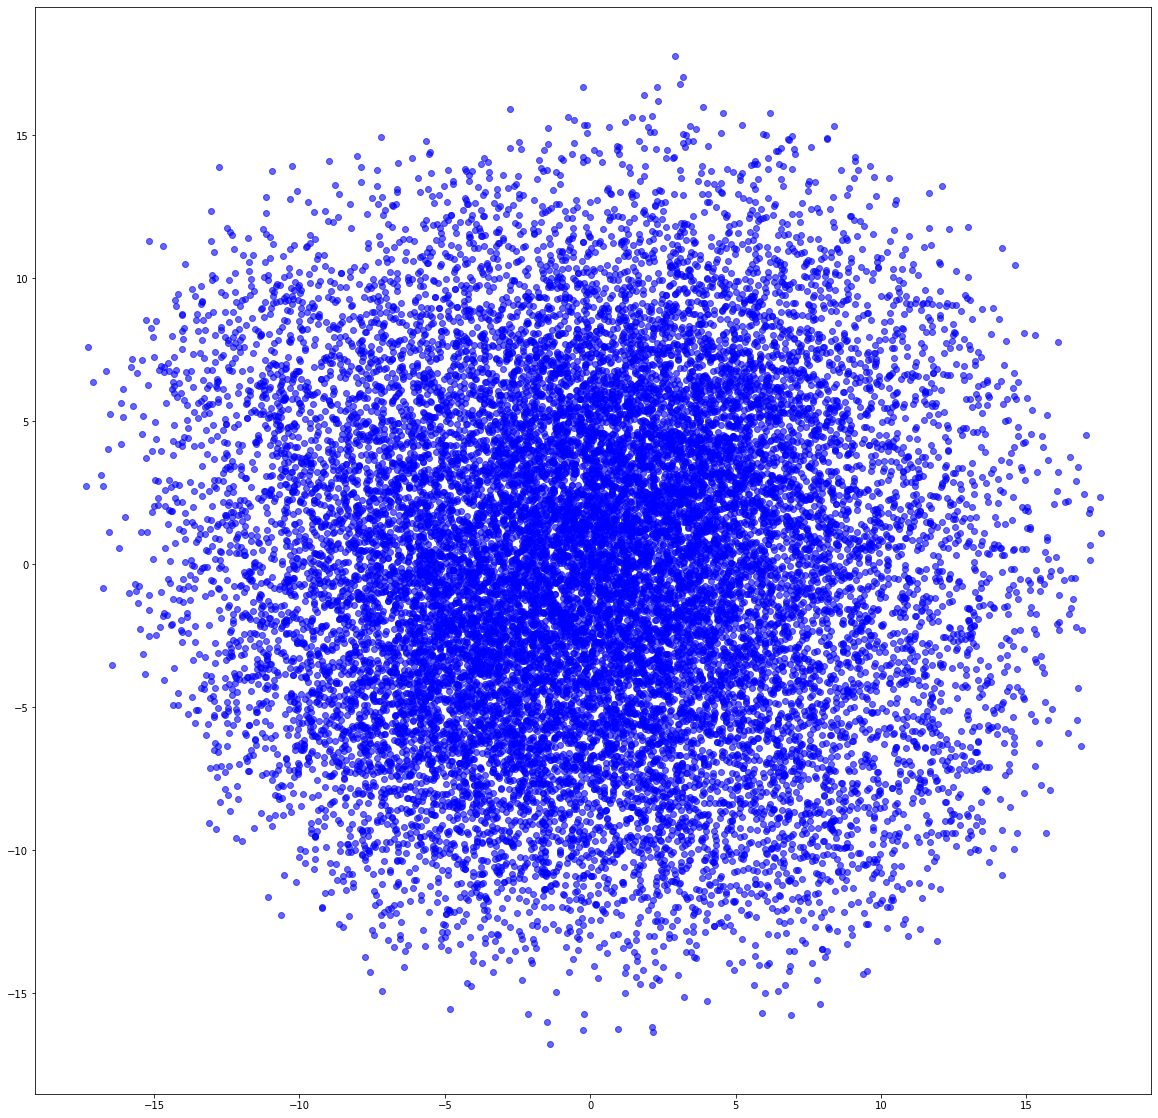

In [33]:
pca_sum = PCA(n_components=2).fit_transform(filament_embeddings)
#cluster_pca = KMeans(n_clusters=3).fit_predict(pca_sum[0:len(corpus)])
pca_sum_hD = PCA(n_components=30).fit_transform(filament_embeddings)

plt.figure(figsize = (20, 20))
plt.scatter(pca_sum[:,0], pca_sum[:,1],alpha=0.6,color='blue')
plt.savefig(output_path+'/'+'mix'+str(percent)+"_bert_pca.png",bbox_inches='tight', pad_inches=0.01)
plt.show()


In [34]:
%%time
n_neighbors=15
min_dist=0.1
#umap_ND=umap.UMAP(n_neighbors=200,min_dist=0.4,n_components=100).fit_transform(filament_embeddings)
reducer = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist)
umap_2D = reducer.fit_transform(filament_embeddings)
umap_ND=umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,n_components=100).fit_transform(filament_embeddings)
print('finish umap')

D:\ProgramData\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


finish umap
Wall time: 45.4 s


In [35]:
with open(output_path+'/'+'umap_3D_bert.npy', 'wb') as f:
    np.save(f, umap_ND)

In [36]:
filament_cluster_number=2
umap_predict=SpectralClustering(n_clusters=filament_cluster_number).fit_predict(umap_ND)
#umap_predict=DBSCAN(eps=0.41, min_samples=100).fit_predict(umap_2D)+1
#filament_cluster_number=len(np.unique(umap_predict))

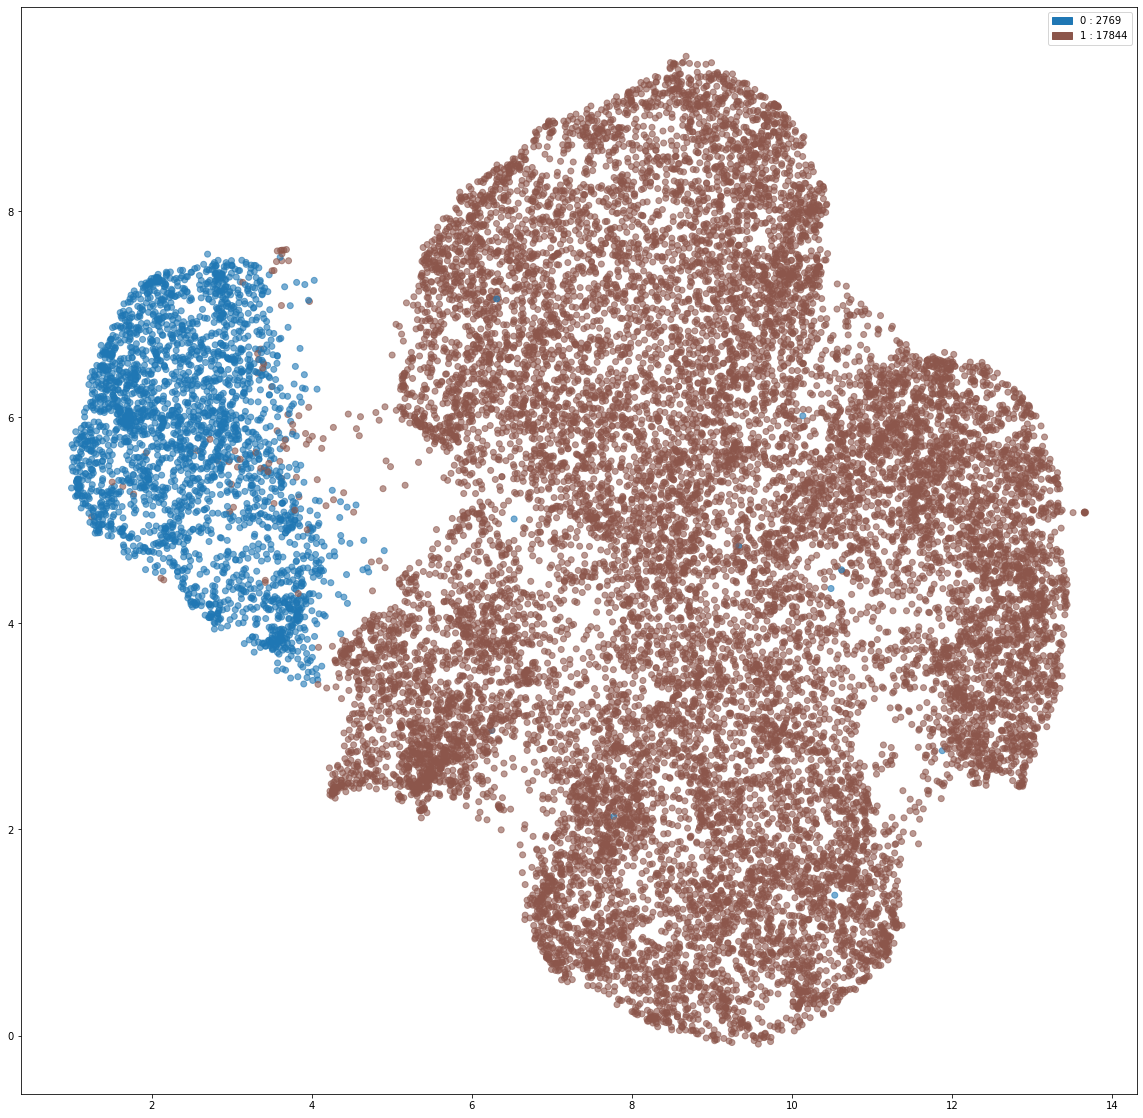

In [37]:
plt.figure(figsize = (20, 20))

for i in range(filament_cluster_number):
    locals()['labels'+str(i)]=mpatches.Patch(color=plt.cm.tab20((i)/filament_cluster_number), 
                                             label=str(i)+' : '+str(np.count_nonzero(umap_predict==i)))
plt.legend(handles=[eval('labels'+str(i)) for i in range(filament_cluster_number)])
plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.6,c=plt.cm.tab20((umap_predict)/filament_cluster_number))
#plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.4,c='blue')
#plt.xlim((-20,20))
#plt.ylim((-10,20))
plt.savefig(output_path+'/'+'mix'+str(percent)+"_bert_umap_blue.png",bbox_inches='tight', pad_inches=0.01)
#c=plt.cm.tab20((umap_predict+1)/filament_cluster_number)

In [38]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    cluster_nameID='clusterID'+str(i)
    locals()[cluster_name]=[]
    locals()[cluster_nameID]=[]
data_line=0
cluster_choice=umap_predict
positive_label=[]
for i in range(len(corpus_code_cut)):
    lst=corpus_code_cut[i]
    cluster_number=cluster_choice[i]
    cluster_name='cluster'+str(cluster_number)
    cluster_nameID='clusterID'+str(cluster_number)
    for j in range(len(lst)):
        locals()[cluster_name].append(data[data_line])
        locals()[cluster_nameID].append(data[data_line][8][18:21])
        data_line+=1
    positive_label.append(locals()[cluster_nameID][-1])
positive_label=np.array(positive_label)
labels=list(np.unique(positive_label))
positive_label_new=np.array([float(labels.index(x)) for x in positive_label])
labels_name=['data0','data1'] # define the type of filaments 
clustersize=[]
for i in range(filament_cluster_number):
    clustersize.append(len(locals()['cluster'+str(i)]))
print(clustersize)

[86162, 420751]


20613


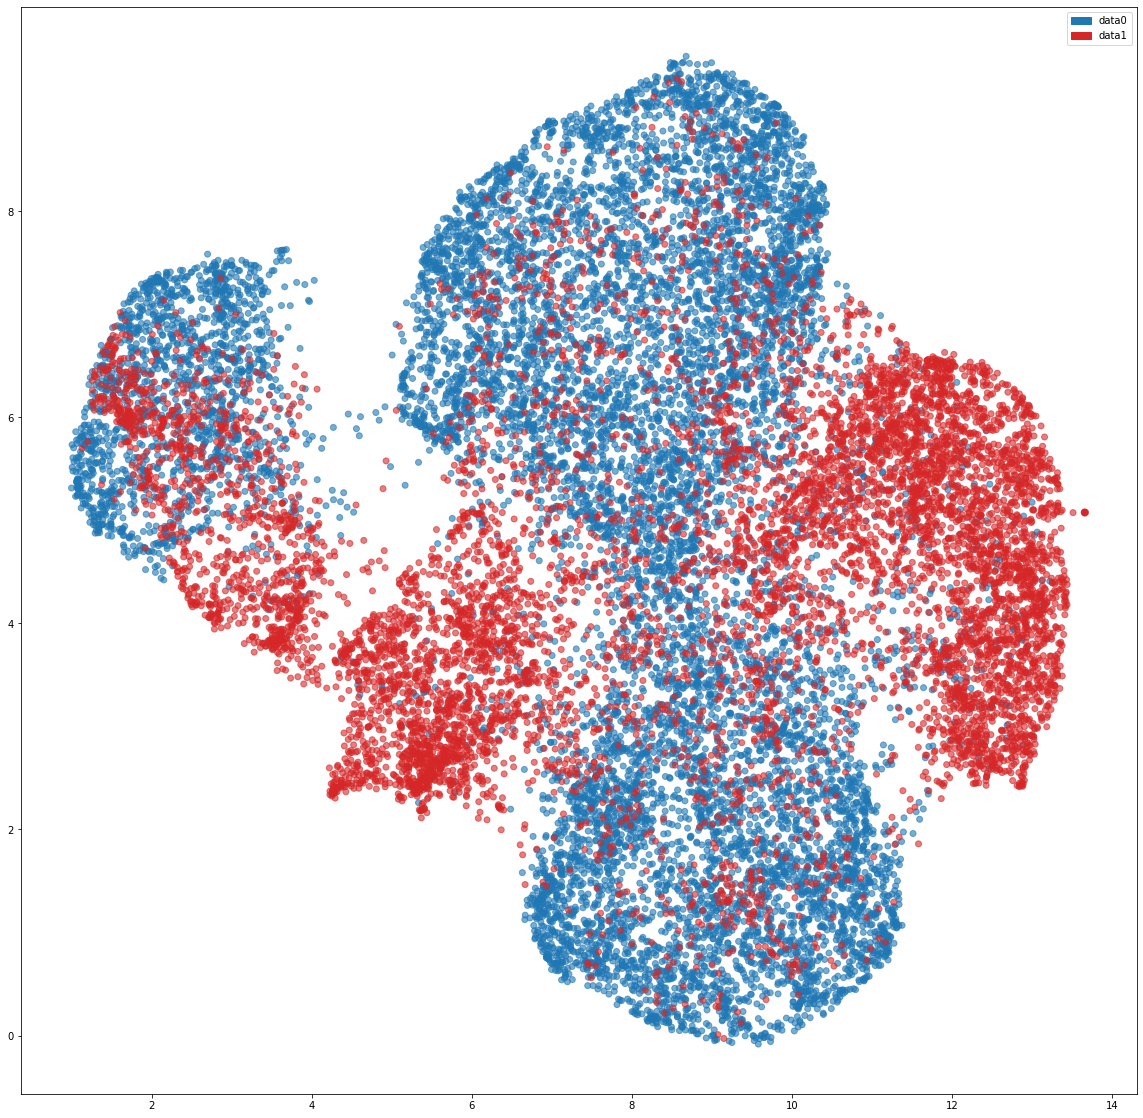

In [39]:
plt.figure(figsize = (20, 20))
for i in range(len(labels_name)):
    locals()['true_label'+str(i)]=mpatches.Patch(color=plt.cm.tab20(i/3), label=labels_name[i])
plt.legend(handles=[eval('true_label'+str(i)) for i in range(len(labels))])
print(len(positive_label))
plt.scatter(umap_2D[:,0], umap_2D[:,1],color=plt.cm.tab20(positive_label_new/3),alpha=0.6)
plt.savefig(output_path+'/'+'mix'+str(percent)+"%_umap_label_bert.png",bbox_inches='tight', pad_inches=0.01)

[[0.6379958682481837, 0.36200413175181634], [0.6875087640908756, 0.3124912359091244]]
506913 86162 420751


NameError: name 'file_name' is not defined

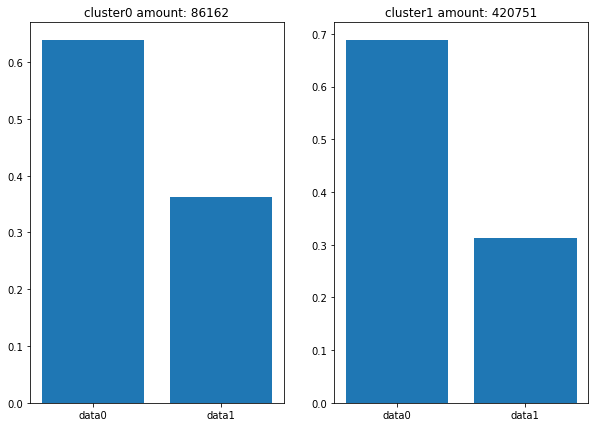

In [40]:
distribution_hist_all=[]
for i in range(filament_cluster_number):
    distribution_hist=[]
    lst=locals()['clusterID'+str(i)]
    for j in range(len(labels)):
        group_percentage=lst.count(labels[j])/len(lst)
        distribution_hist.append(group_percentage)
    distribution_hist_all.append(distribution_hist)
print(distribution_hist_all)
print(len(data),len(cluster0),len(cluster1))

fig, ax = plt.subplots(1,filament_cluster_number,figsize = (5*filament_cluster_number,7))

for i in range(filament_cluster_number):
    ax[i].bar(range(len(labels)),distribution_hist_all[i],tick_label =labels_name)
    particle_number=len(locals()['cluster'+str(i)])
    ax[i].set_title('cluster{} amount: {}'.format(i,particle_number))
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+'distr_new_bert.png')
print('a')

In [ ]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    data_cluster=locals()[cluster_name]
    if datatype==0:
        output=EMdata.output_star(output_path+'/bert_'+file_name,i,data_cluster,metadata)
        output.opticgroup(optics)
        output.writecluster()
    elif datatype==1:
        output=EMdata.output_star(output_path+'/'+file_name,i,data_cluster,metadata)
        output.writemetadata()
        output.writecluster()